<a href="https://colab.research.google.com/github/flpsantos3/PD_part3/blob/main/PD03_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining / Prospeção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 3 - Classification/Regression

## Logistics

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 3 and 4**  for groups of 2 and 3 students, respectively.
    * In Task **4**, groups of 2 and 3 students should try 2 and 3 ensemble approaches, respectively.

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of ~~`May, 9th (23:59)`~~ `May, 16th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P3.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`RestaurantsRevenue.csv`**, a modified version of the test dataset used in Kaggle's competition ["Restaurant Revenue Prediction"](https://www.kaggle.com/c/restaurant-revenue-prediction/overview). 

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the revenue, and a
2. **Classification Task**: predict a revenue category.

The available variables are:

* **Id :** Restaurant id. 
* **Open Date :** opening date for a restaurant
* **City :** City that the restaurant is in. Note that there are unicode in the names. 
* **City Group:** Type of the city. Big cities, or Other. 
* **Type:** Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* **P1, P2 - P37:** There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.


The targets are:
1. **`Revenue`:** The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 
2. **`RevenueCategory`** - the revenue category, where price can be below 12000 ("<12K"), between 12000 and 20000 ("12K-20K"), or above 20000 (">20K"). This is the target variable that you're trying to predict in the classification task. 

## Team Identification

**GROUP PD03**

Students:

* **Eduardo Carvalho - nº55881**
* **Filipe Santos - nº55142**
* **Ivo Oliveira - nº50301**

## 1. Load and Preprocess Dataset

Here you might consider useful to think about:
1. Missing Value Imputation
2. Feature Selection
3. Class Imbalance

### Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import tree, neighbors
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.naive_bayes import GaussianNB

### Importing the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/RestaurantsReveneu.csv', index_col=0)
data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10033.0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,9355.0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,11353.0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,10828.0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,9354.0


### Exploratory Data Analysis

In [5]:
# looking at the dataset shape
data.shape

(100000, 42)

> We have a dataset with 100K observations and 41 features + 1 target variable - `revenue`.

In [6]:
# looking at data types
data.dtypes 

Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

> There doesn't seem to be any errors in the data types: all numerical features are either int or float and the categorical are objects.

In [7]:
# looking at the range of values of the numerical features
data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,3.311720,5.061440,5.086630,1.280090,1.305530,1.747070,1.156880,1.708470,5.191120,4.57086,2.542380,2.430380,3.63998,1.234450,1.244110,1.279665,1.164440,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500,14698.061620
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,2.068118,1.765383,0.979339,2.496782,2.166949,3.172012,2.432646,3.030527,5.785529,3.61243,2.526046,1.363184,4.71916,2.097457,2.084731,2.309640,2.179495,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267,6705.081965
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6271.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10143.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.00000,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12951.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.00000,3.000000,3.000000,4.00000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,16923.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,15.000000,25.000000,15.00000,15.000000,5.000000,25.00000,10.000000,10.000000,12.500000,12.500000,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000,52294.000000


> All the P(X) features have small ranges (most are between 0 and 20), so there doesn't appear to exist any errors in the data.
>
> The target variable `revenue` has a large range of values, with the min being 6K and the max > 50K. 
>
> We should look at outliers in this variable.

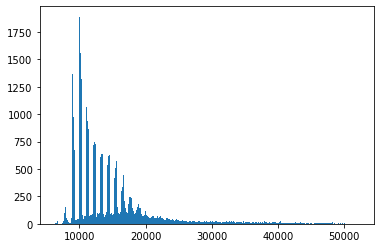

In [8]:
plt.hist(data.revenue, bins=1000)
plt.show()

> Most revenue values are situated between 10K and 20K. The remaining values are evenly spaced between the 20K range and the 50K range. There doesn't seem to exist any restaurant with a much larger revenue than the rest.

In [9]:
# looking at categorical features
cat_vars = ['Open Date', 'City', 'City Group', 'Type']
for var in cat_vars:
  print(var)
  print(data[var].nunique())
  print(data[var].value_counts())
  print('\n')

Open Date
310
07/10/2013    645
05/06/2013    635
07/04/2011    635
09/20/2013    632
03/05/1996    631
             ... 
11/25/2009    276
08/23/2013    275
09/01/2010    274
11/12/2010    267
12/23/2012    265
Name: Open Date, Length: 310, dtype: int64


City
57
İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman         

> There are two problems with the categorical data in the dataset:
>
> *   `Open Date`: there are too many different values in this feature to be able to treat it like a categorical variable (encoding the feature would lead to a large number of new features that would add too much noise to the data).
> 
> There is, however, a solution: we can convert this categorical feature to a numerical one that represents the number of days since the restaurant opened, keeping all the information and solving the current issue.
>
> *   `City`: like the issue before, there are 31 different cities on the dataset. Encoding them all would lead to the addition of over 30 new features to the dataset. However, we have another feature - `City Group` - that can gives us location info while only having 2 different values. We can use `City Group` and drop `City` from the dataset.



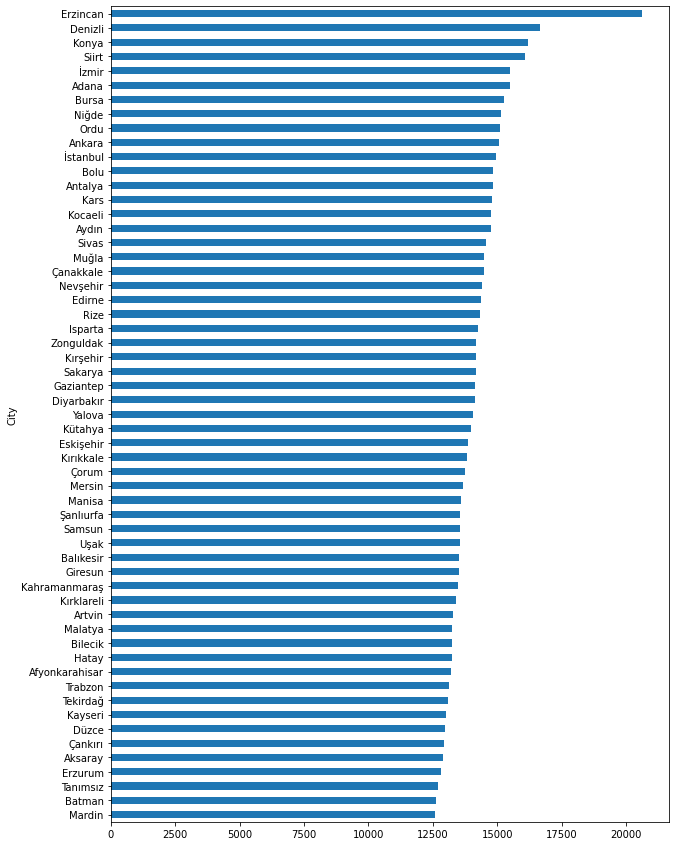

In [10]:
revenue_by_city = data.revenue.groupby(data.City).mean().sort_values()
revenue_by_city.plot.barh(figsize=(10,15))
plt.show()

> There doesn't seem to be a considerable difference in Revenue between different cities (the only City that does not fit the norm is Erzincan, which is considerably higher than the rest).
>
> It appears to be relatively "safe" to drop `City` and get location information solely from `City Group`.

In [11]:
# converting Open Date to days_since_open
days_since_open=[]
for dt in data['Open Date']:
  open_date = datetime.strptime(dt, "%m/%d/%Y").date()
  today = date.today()
  delta = today - open_date
  days_since_open.append(delta.days)

data['days_since_open']=days_since_open
new_data=data.drop('Open Date', axis=1)

# dropping City
new_data=new_data.drop('City', axis=1)
new_data.head(3)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,days_since_open
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10033.0,3774
1,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,9355.0,3719
2,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,11353.0,2762


### Missing Values

In [12]:
# checking the number of nulls for each feature
new_data.isnull().sum()

City Group         0
Type               0
P1                 0
P2                 0
P3                 0
P4                 0
P5                 0
P6                 0
P7                 0
P8                 0
P9                 0
P10                0
P11                0
P12                0
P13                0
P14                0
P15                0
P16                0
P17                0
P18                0
P19                0
P20                0
P21                0
P22                0
P23                0
P24                0
P25                0
P26                0
P27                0
P28                0
P29                0
P30                0
P31                0
P32                0
P33                0
P34                0
P35                0
P36                0
P37                0
revenue            0
days_since_open    0
dtype: int64

> There are no null values in the dataset. As such, there is no need to think about missing value imputation strategies to employ.

### Feature Selection

In [13]:
new_data.shape

(100000, 41)

> We still have 40 features in the dataset, 37 of which represent the 3 categories of obfuscated data. We should look at these variables and select from among them the most relevant ones.
>
> We will use the VarianceThreshold method and select the features which show the largest variance.

In [14]:
num_vars=new_data.iloc[:, 2:39]
num_vars.head(3)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0


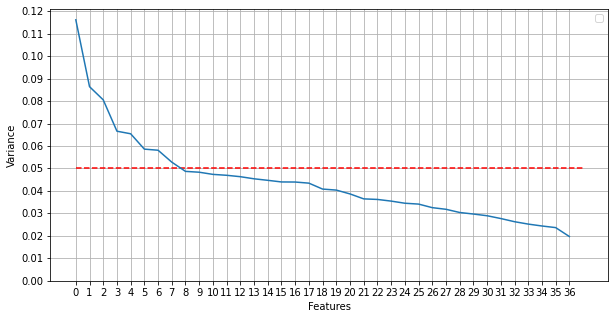

In [15]:
# creating a VarianceThreshold object with threshold=0
var_thresh = VarianceThreshold(threshold=0)

# standardizing the data
std_num_vars = MinMaxScaler().fit_transform(num_vars)

# fitting the object to the standardized dataset
var_thresh.fit(std_num_vars)

# creating a dataframe containing the variances for all the features in the dataset
df_var=pd.DataFrame(var_thresh.variances_, columns=['Variance'])\
                .sort_values(by='Variance', ascending=False)
# plotting the variances in df_var
# we need to reset the index for the plot to make sense
plt.figure(figsize=(10, 5))
plt.plot(df_var.reset_index(drop=True))
plt.grid(True)
plt.hlines(y=0.05, xmin=0, xmax=len(df_var), linestyles='--', colors='red')
plt.xlabel('Features')
plt.xticks(range(0, len(df_var)))
plt.ylabel('Variance')
plt.yticks(np.arange(0, 0.13, 0.01))
plt.legend('')
plt.show()

> The variance seems to stabilize below 0.05 so we will only choose the features which have variance higher than 0.05.

In [16]:
df_var[df_var['Variance']>0.05]

,Variance
21,0.116141
9,0.086396
8,0.080526
19,0.066579
32,0.065434
6,0.058595
18,0.058111
10,0.052803


In [17]:
int_vars=list(df_var[df_var['Variance']>0.05].index)
high_var=num_vars.iloc[:, int_vars]
high_var.head(3)

,P22,P10,P9,P20,P33,P7,P19,P11
Id,,,,,,,,
0,1,5,5,5,0,5,5,5
1,2,4,4,5,0,5,5,2
2,5,5,4,5,0,5,5,4


> From the original 37 features of obfuscated data we are left with only 8, the features with the highest variance among them.

In [18]:
cols_to_keep = ['revenue', 'City Group', 'Type', 'days_since_open'] + list(high_var.columns)
new_data = new_data[cols_to_keep]
new_data.head(3)

,revenue,City Group,Type,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11
Id,,,,,,,,,,,,
0,10033.0,Other,FC,3774,1,5,5,5,0,5,5,5
1,9355.0,Other,IL,3719,2,4,4,5,0,5,5,2
2,11353.0,Big Cities,FC,2762,5,5,4,5,0,5,5,4


### Encoding categorical features - `City Group` and `Type`

> `City Group` and `Type` are categorical features, with strings as values. We need to convert these to a model friendly format. The get_dummies function from pandas performs One-Hot Encoding on a dataset, creating new features for each group in each feature, that represent the presence or absence of that feature in each row.

In [19]:
# using get_dummies function
enc_data=pd.get_dummies(new_data, columns=['City Group', 'Type'])

# keeping only Big_Cities - Big Cities have value 1, Others have value 0
enc_data=enc_data.drop('City Group_Other', axis=1)

# renaming Big Cities
enc_data=enc_data.rename(columns={'City Group_Big Cities':'Big_Cities'})

enc_data.head(3)

,revenue,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,10033.0,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


### Creating classification target - `RevenueCategory`

In [20]:
# creating new feature according to the project info
rev_category=[]
for val in data.revenue:
  if val < 12000:
    rev_category.append("<12K")
  elif val > 12000 and val < 20000:
    rev_category.append("12K-20K")
  else:
    rev_category.append(">20K")

enc_data.insert(1, 'RevenueCategory', rev_category)
enc_data.head(3)

,revenue,RevenueCategory,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,,
0,10033.0,<12K,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,<12K,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,<12K,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [21]:
# checking class balance
enc_data.RevenueCategory.value_counts()

12K-20K    43926
<12K       43401
>20K       12673
Name: RevenueCategory, dtype: int64

> The class of >20K revenue has a much lower count than the rest. We will need to upsample the number of observations in this category to the number of observations of the remaining classes, as to avoid classification metrics' bias.
>
> We will need to create 30000 new observations for this class to match the number of elements in each of the other 2, using sklearn's resample function.
>
> Before we upsample, we will have to separate the dataset into 2, one for each task, as to not influence the values for the target variable `revenue` when we upsample the >20K category entries.

In [22]:
# separating minority and majority classes
df_min = enc_data[enc_data['RevenueCategory']=='>20K']
df_major = enc_data[enc_data['RevenueCategory']!='>20K']

# upsampling
df_min_upsample = resample(df_min,
                           replace=True,
                           n_samples=43000,
                           random_state=0)

# creating class_data, the dataset for the classification task
class_data=pd.concat([df_major, df_min_upsample])
class_data=class_data.drop('revenue', axis=1)

class_data.RevenueCategory.value_counts()

12K-20K    43926
<12K       43401
>20K       43000
Name: RevenueCategory, dtype: int64

> While this choice fixes the imbalance issue, it can cause problems when it comes to overfitting, as we are introducing in the dataset more of the same data. We will have to take this into consideration when looking at the models' metrics.

In [23]:
print('There are', str(class_data.shape[0]), 'rows and', str(class_data.shape[1]-1), 'features in the classification dataset.\n')
class_data.head(3)

There are 130327 rows and 14 features in the classification dataset.



,RevenueCategory,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,<12K,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,<12K,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,<12K,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [24]:
# creating reg_data, the dataset for the regression task
reg_data=enc_data.drop('RevenueCategory', axis=1)

print('There are', str(reg_data.shape[0]), 'rows and', str(reg_data.shape[1]-1), 'features in the regression dataset.\n')
reg_data.head(3)

There are 100000 rows and 14 features in the regression dataset.



,revenue,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,10033.0,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


> This concludes the preprocessing part of the project. We are left with one dataset for each of the classification and regression tasks, containing over 100 thousand entries and 14 features. There are 2 target variables: `revenue` for the regression task and `RevenueCategory` for the classification task.

## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

### Splitting and scaling the data


In [89]:
# splitting the data
# define target variable revenue
y=class_data['RevenueCategory']

# split numerical data
class_datax = class_data.iloc[:, 1:] 
X_train, X_test, y_train, y_test = train_test_split(class_datax, y, test_size=0.3, random_state=0)
print(X_test.shape)

# standardizing the data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(39099, 14)


### Decision Tree Classifier


In [115]:
#implementing decision tree classifier with criterion = "Gini"
dtc_Gini = tree.DecisionTreeClassifier() 
dtc_Gini = dtc_Gini.fit(X_train_scaled, y_train)
print("Accuracy on training set:",  dtc_Gini.score(X_train_scaled, y_train))

Accuracy on training set: 0.9806967159205507


In [116]:
y_test_pred = dtc_Gini.predict(X_test_scaled)
print("Accuracy on test set:",  dtc_Gini.score(X_test_scaled, y_test))

Accuracy on test set: 0.826440573927722


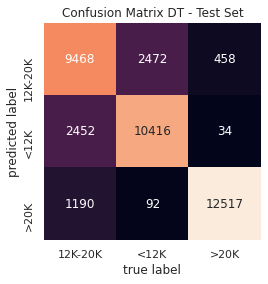

In [29]:
# confusion_matrix for decision tree gini
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

> The classifier was less accurate in the test set with value equal to 0.83.
>
> The classifier classified correctly 83,7% of the y_test instances, having the most trouble in distinguishing the "<12k" and "12k-20k" labels.

#### Decision Tree best parameters:

In [ ]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

gs_dtr = GridSearchCV(estimator=tree.DecisionTreeClassifier(), 
                  param_grid=tree_para, 
                  cv=10,
                  n_jobs=-1
                  ,verbose=2
                  )

gs_dtr.fit(X_train_scaled, y_train)
print(gs_dtr.best_score_)
print(gs_dtr.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.6min finished


0.835741086103743
{'criterion': 'entropy', 'max_depth': 20}


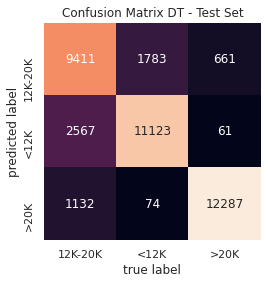

In [105]:
gs_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =20)
gs_tree = gs_tree.fit(X_train_scaled, y_train)

cm_test = confusion_matrix(y_test, gs_y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(gs_y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

In [104]:
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =20)

scoring=['accuracy', 'precision_macro', 'recall_macro']

scores = cross_validate(model, X_test_scaled, y_test, 
                         scoring=scoring, cv=10, n_jobs=-1)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),
                                      np.std(scores['test_accuracy'])))
print('CV precision: %.3f +/- %.3f' % (np.mean(scores['test_precision_macro']),
                                      np.std(scores['test_precision_macro'])))
print('CV recall: %.3f +/- %.3f' % (np.mean(scores['test_recall_macro']),
                                      np.std(scores['test_recall_macro'])))

CV accuracy: 0.804 +/- 0.005
CV precision: 0.802 +/- 0.005
CV recall: 0.805 +/- 0.005


> The classifier was more accurate in the test set with this optimal parameters than before.
>
> The classifier classified correctly 80.4% of the y_test instances.

### K-NearestNeighbors Classifier

In [109]:
#Classifier KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train_scaled, y_train)
print("Accuracy on training set:",  knn.score(X_train_scaled, y_train))

Accuracy on training set: 0.8383719910553777


In [110]:
y_test_pred_knn = knn.predict(X_test_scaled)
print("Accuracy on test set:",  knn.score(X_test_scaled, y_test))

Accuracy on test set: 0.8090999769815085


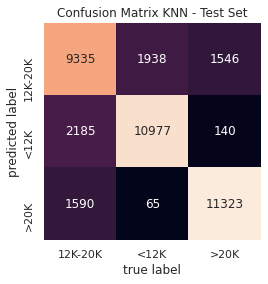

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred_knn)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_knn))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix KNN - Test Set')
plt.show()

> The classifier classified correctly 80,9% of the y_test instances.

k: 5 Accuracy on training set: 0.9802144078572368
k: 15 Accuracy on training set: 0.9804884465295742
k: 25 Accuracy on training set: 0.9806967159205507
k: 35 Accuracy on training set: 0.9806967159205507
k: 45 Accuracy on training set: 0.9806967159205507
k: 55 Accuracy on training set: 0.9806967159205507
done


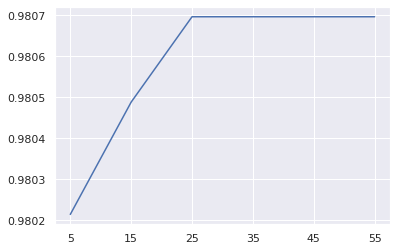

In [ ]:
results={}
for k in range(5, 56, 10):
  knClass=neighbors.KNeighborsClassifier(n_neighbors=k, algorithm='auto', weights='distance')
  knClass.fit(X_train_scaled, y_train)
  print("k:",k,"Accuracy on training set:",  knClass.score(X_train_scaled, y_train))
  results[k]=knClass.score(X_train_scaled, y_train)

n_neighbors=list(results.keys())
knn_acc=list(results.values())
plt.plot(n_neighbors, knn_acc)
plt.xticks(n_neighbors)
plt.grid(True)
plt.show()

#### K-NearestNeighbors best parameters:


In [ ]:
knr_params={'n_neighbors': [10,11,12,13,14,15]
            #,
            #'weights': ['uniform', 'distance'],
            #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

gs_knr = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), 
                  param_grid=knr_params, 
                  cv=10,
                  n_jobs=-1)

gs_knr.fit(X_train_scaled, y_train)
print(gs_knr.best_score_)
print(gs_knr.best_params_)

> We couldn't find the best parameters for the k_NearestNeighbors classifier because it crashed our runtime repeatedly, but we know it's somewhere near k=15.

CV accuracy: 0.804 +/- 0.006
CV precision: 0.803 +/- 0.005
CV recall: 0.804 +/- 0.006




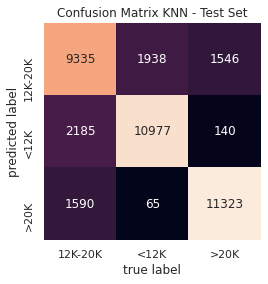

In [123]:
gs_knn = neighbors.KNeighborsClassifier(n_neighbors=15)
gs_knn = gs_knn.fit(X_train_scaled, y_train)

scoring=['accuracy', 'precision_macro', 'recall_macro']

scores = cross_validate(gs_knn, X_test_scaled, y_test, 
                         scoring=scoring, cv=10, n_jobs=-1)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),
                                      np.std(scores['test_accuracy'])))
print('CV precision: %.3f +/- %.3f' % (np.mean(scores['test_precision_macro']),
                                      np.std(scores['test_precision_macro'])))
print('CV recall: %.3f +/- %.3f' % (np.mean(scores['test_recall_macro']),
                                      np.std(scores['test_recall_macro'])))
print('\n')

cm_test = confusion_matrix(y_test, y_test_pred_knn)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_knn))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix KNN - Test Set')
plt.show()

> With k=15 the classifier was able to perform better and classified correctly 80.4% of the y_test instances.

### Gaussian Naive Bayes Classifier

In [111]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_scaled, y_train)
print("Accuracy on training set:",  gnb.score(X_train_scaled, y_train))

Accuracy on training set: 0.7651598193537072


In [112]:
y_test_pred_gnb = gnb.predict(X_test_scaled)
y_test_pred_gnb

print("Accuracy on test set:",  gnb.score(X_test_scaled, y_test))

Accuracy on test set: 0.7651602342770915


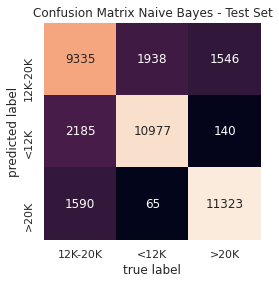

In [ ]:
sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_gnb))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix Naive Bayes - Test Set')
plt.show()

> The classifier as the same accuracy for the test set and the train set. It classified correctly 76.5% of the y_test instances.

#### Gaussian Naive Bayes best parameters:

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_scaled, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


{'var_smoothing': 0.0002848035868435802}

CV accuracy: 0.764 +/- 0.006
CV precision: 0.758 +/- 0.007
CV recall: 0.764 +/- 0.006




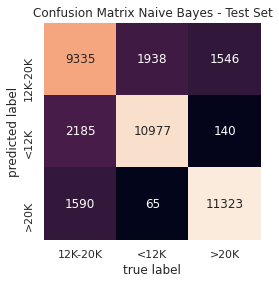

In [117]:
gs_gnb = GaussianNB(var_smoothing= 0.0002848035868435802)
gs_gnb = gs_gnb.fit(X_train_scaled, y_train)

scoring=['accuracy', 'precision_macro', 'recall_macro']

scores = cross_validate(gs_gnb, X_test_scaled, y_test, 
                         scoring=scoring, cv=10, n_jobs=-1)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),
                                      np.std(scores['test_accuracy'])))
print('CV precision: %.3f +/- %.3f' % (np.mean(scores['test_precision_macro']),
                                      np.std(scores['test_precision_macro'])))
print('CV recall: %.3f +/- %.3f' % (np.mean(scores['test_recall_macro']),
                                      np.std(scores['test_recall_macro'])))
print('\n')

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_gnb))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix Naive Bayes - Test Set')
plt.show()

> Theoretically, with the grid search optimal parameters, these results should be more accurate. However, the classifier performed about the same with or without the best parameters.

### Logistic Regression Classifier

In [118]:
# Logistic Regression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_scaled, y_train)
print("Accuracy on training set:",  logreg.score(X_train_scaled, y_train))

Accuracy on training set: 0.7952054193887842


In [119]:
y_test_pred_logreg = logreg.predict(X_test_scaled)
y_test_pred_logreg

print("Accuracy on test set:",  logreg.score(X_test_scaled, y_test))

Accuracy on test set: 0.7940868052891378


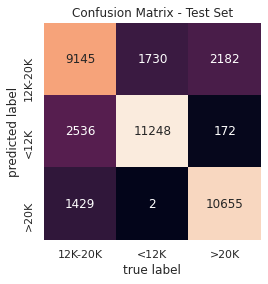

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred_logreg)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_logreg))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')
plt.show()

> The classifier has about the same accuracy in the training and test sets.
> 
> It labeled correctly only 79,4% of the y_test instances.

#### Logistic Regression best parameters:


In [122]:
gs_LRclass=GridSearchCV(cv=10,
             estimator=LogisticRegression(
                                          intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000,1000000]})


gs_LRclass.fit(X_train_scaled, y_train)

gs_LRclass.best_params_

{'C': 100}

CV accuracy: 0.794 +/- 0.007
CV precision: 0.796 +/- 0.006
CV recall: 0.795 +/- 0.007




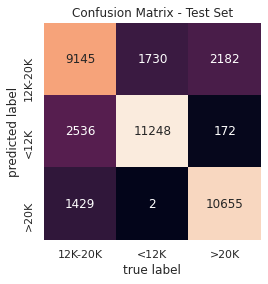

In [121]:
gs_logreg = LogisticRegression(C=100)
gs_logreg.fit(X_train_scaled, y_train)

scoring=['accuracy', 'precision_macro', 'recall_macro']

scores = cross_validate(gs_logreg, X_test_scaled, y_test, 
                         scoring=scoring, cv=10, n_jobs=-1)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),
                                      np.std(scores['test_accuracy'])))
print('CV precision: %.3f +/- %.3f' % (np.mean(scores['test_precision_macro']),
                                      np.std(scores['test_precision_macro'])))
print('CV recall: %.3f +/- %.3f' % (np.mean(scores['test_recall_macro']),
                                      np.std(scores['test_recall_macro'])))
print('\n')

cm_test = confusion_matrix(y_test, y_test_pred_logreg)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_logreg))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')
plt.show()

### Conclusions Classifiers

> The best classifier for our dataset was the decision tree, it was the most accurate and the one which classified correctly the most target instances.

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

> As we saw at the end of the preprocessing stage, we were left with 2 datasets, one for each task. For the regression task, the dataset to be used is `reg_data`, a dataset with 14 features, where the target variable is the continuous feature `revenue`, the amount of money each restaurant made in a year.

In [65]:
reg_data.head(3)

,revenue,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,10033.0,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [66]:
reg_data.shape

(100000, 15)

> The next step is to separate the target from the remaining features and slit the dataset into train and test sets.

In [67]:
# splitting features and target
X = reg_data.drop('revenue', axis=1)
y = reg_data.revenue

# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> We need to standardize the data, as `days_since_open` has a much larger range than the remaining features.

In [68]:
X_train.describe()

,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4619.598486,2.432500,5.467486,5.253929,4.576143,0.987129,5.301943,5.191400,3.315529,0.492800,0.022629,0.569900,0.404543,0.002929
std,1747.606748,1.363928,1.772549,1.705614,3.610776,1.535679,2.184265,5.790484,2.077664,0.499952,0.148717,0.495093,0.490807,0.054037
min,2696.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3336.000000,1.000000,5.000000,4.000000,2.000000,0.000000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4104.000000,2.000000,5.000000,5.000000,4.000000,0.000000,5.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5181.000000,3.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,9512.000000,5.000000,10.000000,10.000000,15.000000,6.000000,10.000000,25.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# standardizing the data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> Moving on to the modes, the four chosen regression models were **Ridge**, **SVR**, **KNeighborsRegressor** and **DecisionTreeRegressor**.
>
> We will define different values for the parameters we considered to be the most critical for each models' performance and run GridSearchCV to find the ones that minimize the mean absolute error of the predictions for X_test.

### Ridge

> The first model we will build is Ridge, a linear model with l2 regularization. GridSearchCV will be used to search for the values of the **alpha** and **solver** parameters that maximize the negative mean absolute error (that show the lowest positive mean absolute error).

In [59]:
ridge_params={'alpha': [0.1, 1, 10, 100],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

gs = GridSearchCV(estimator=Ridge(), 
                  param_grid=ridge_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_scaled, y_train)
print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


-2167.559105392059
{'alpha': 100, 'solver': 'svd'}


> It seems that the mean absolute error is lowest when alpha=100 and the solver used is 'svd'. We can build the final model using these parameters and predict the `revenue` values for the scaled test set.

In [86]:
# building Ridge model with the best parameters from Gridsearch
gs_ridge=Ridge(alpha=100, solver='svd', random_state=0)
gs_ridge.fit(X_train_scaled, y_train)

# calculating mean absolute error of the prediction
scores = cross_val_score(gs_ridge, X_test_scaled, y_test, cv=10, 
                scoring='neg_mean_absolute_error', n_jobs=-1)
print('MAE:', str(-scores.mean()))

MAE: 2151.060830595733


> The mean absolute error for a Ridge regressor with alpha=10 and solver='saga' is **2151**. This seems to be an OK value, when we take into account the target variable's range of values.

### Decision Tree Regressor

> The next model is a DecisionTree Regressor. We will look at the best values for the parameters **criterion**, **splitter**, **min_samples_split** and **max_features**.
>
> criterion and splitter were ran separately as GridSearchCV took a very long time to fit every combination of parameters.

In [38]:
dtr_params={'criterion': ['mse'], # tried mse, friedman_mse, mae, poisson
            'splitter': ['best'], # tried random too
            'min_samples_split': np.arange(0.1, 1.1, 0.1),
            'max_features': list(range(1,15))
            }

gs_dtr = GridSearchCV(estimator=DecisionTreeRegressor(), 
                  param_grid=dtr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1,
                  verbose=2)

gs_dtr.fit(X_train_scaled, y_train)
print(gs_dtr.best_score_)
print(gs_dtr.best_params_)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:   52.2s finished


-2390.635071533513
{'criterion': 'mse', 'max_features': 14, 'min_samples_split': 0.1, 'splitter': 'best'}


> We end up with a DecisionTreeRegressor with criterion='mse', max_features=14 (all of them), min_samples_split=0.1 and splitter='best'. We can now fit a model with these parameters and predict the `revenue` values.

In [85]:
# building DecisionTreeRegressor model with the best parameters from Gridsearch
gs_dtree=DecisionTreeRegressor(criterion='mse',
                               splitter='best',
                               min_samples_split=0.1,
                               max_features=14,
                               random_state=0)

gs_dtree.fit(X_train_scaled, y_train)

# calculating mean absolute error of the prediction
scores = cross_val_score(gs_dtree, X_test_scaled, y_test, cv=10, 
                scoring='neg_mean_absolute_error', n_jobs=-1)
print('MAE:', str(-scores.mean()))

MAE: 2385.306144390457


> The mean absolute error for this model is **2385.3**, a larger error than the previous model.

### K-Neigbors Regressor

> For KNeighborsRegressor, we will do a preliminary study to find the best values for the parameters **n_neighbors**, **weights** and **algorithm**. For **n_neighbors** we will use a wide range of values that we will try to limit in the next step.

In [43]:
knr_params={'n_neighbors': list(range(5, 106, 10)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gs_knr = GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), 
                  param_grid=knr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs_knr.fit(X_train_scaled, y_train)
print(gs_knr.best_score_)
print(gs_knr.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


-1891.0103457841165
{'algorithm': 'brute', 'n_neighbors': 45, 'weights': 'distance'}


> The best parameters seem to be weights='distance', algorithm='brute' and n_neighbors=45. As we used a wide range of values for this last parameter, we will now run KNeighborsRegressor with the values we found but with a more limited window for n_neighbors.

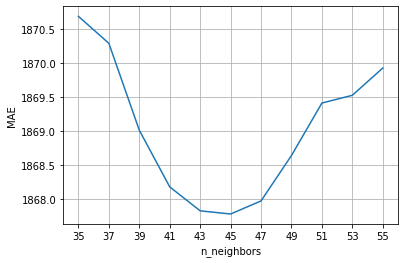

In [44]:
results={}
for k in range(35, 56, 2):
  gs_knreg=KNeighborsRegressor(n_neighbors=k, weights='distance', algorithm='brute')
  gs_knreg.fit(X_train_scaled, y_train)

  # predicting X_test values
  gs_y_pred = gs_knreg.predict(X_test_scaled)

  # calculating mean absolute error of the prediction
  mae = mean_absolute_error(y_test, gs_y_pred)
  results[k]=mae

n_neighbors=list(results.keys())
knn_mae=list(results.values())
plt.plot(n_neighbors, knn_mae)
plt.xticks(n_neighbors)
plt.xlabel('n_neighbors')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

> Minimum MAE seems to be exactly 45, the number of neighbors we had previously, so there is no need to change the previous values we found. The final KNeighborsRegressor model can now be built.

In [84]:
# building KNeighborsRegressor model with the best parameters from Gridsearch
gs_knreg=KNeighborsRegressor(n_neighbors=45, algorithm='brute', weights='distance')
gs_knreg.fit(X_train_scaled, y_train)

# calculating mean absolute error of the prediction
scores = cross_val_score(gs_knreg, X_test_scaled, y_test, cv=10, 
                scoring='neg_mean_absolute_error', n_jobs=-1)
print('MAE:', str(-scores.mean()))

MAE: 1904.9750063461938


The mean absolute error for the prediction when using a KNeighborsRegressor with n_neighbors=45, algorithm='brute' and weights='distance' is **1905**, the lowest error of the models we have seen so far and the only value under 2000.

### LinearSVR

> We opted for LinearSVR instead of regular SVR because fitting the latter to the data takes much longer than with LinearSVR.
>
> The parameters that we chose to tune in GridSearchCV were **C** (the regularization parameter), **loss** (the loss function to be used) and **dual** (whether to solve the dual or primal optimization problem).

In [ ]:
svr_params={'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
            'dual': [True, False],
            'C': [0.1, 1, 10, 100, 1000]}

gs_svr = GridSearchCV(estimator=LinearSVR(random_state=0), 
                  param_grid=svr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs_svr.fit(X_train_scaled, y_train)
print(gs_svr.best_score_)
print(gs_svr.best_params_)

-2090.642557092206
{'C': 100, 'dual': True, 'loss': 'epsilon_insensitive'}


> The best parameters were C=100, dual=True and loss='epsilon_insensitive'. We can now build a model with these parameter values, fit the data and predict `revenue` values for the test set.

In [83]:
# building LinearSVR model with the best parameters from Gridsearch
gs_svreg=LinearSVR(loss='epsilon_insensitive', C=100, dual=True, random_state=0)
gs_svreg.fit(X_train_scaled, y_train)

# calculating mean absolute error of the prediction
scores = cross_val_score(gs_svreg, X_test_scaled, y_test, cv=10, 
                scoring='neg_mean_absolute_error', n_jobs=-1)
print('MAE:', str(-scores.mean()))

MAE: 2076.516858136346


> After using the LinearSVR model, we obtain a mean absolute error of **2076.5** for the predicted `revenue` values.

> After fitting and testing each model, we found that the best 3 of the 4 models were **KNeighbors Regressor** (MAE=1905) followed by **LinearSVR** (MAE=2076.5) and **Ridge** (MAE=2151). **DecisionTreeRegressor** was the worst with a mean absolute error of 2385.3.

## 4. Ensemble Learning

### Voting Classifier/Regressor

* Use a voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)/regressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) to combine the best results of the `X` classifiers/regressors from previous sections. 

In [ ]:
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier 
from xgboost import XGBClassifier, XGBRegressor
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
class_data.head(3)

,RevenueCategory,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,<12K,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,<12K,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,<12K,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [ ]:
# splitting features and target
X = class_data.drop('RevenueCategory', axis=1)
y = class_data.RevenueCategory

# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> We need to standardize the data, as `days_since_open` has a much larger range than the remaining features.

In [ ]:
# standardizing the data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### XGBoost 

* Use [XGBoost](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn).

In [ ]:
# Present and Discuss your results here
# ...

xgb = XGBClassifier(random_state=1,learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)
y_val_pred = xgb.predict_proba(X_test_scaled)
log_loss(y_test, y_val_pred)

0.4525391033023695

### Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=250, criterion='entropy',  n_jobs = -1,  random_state=1)
rf1.fit(X_train_scaled, y_train)
y_val_pred = rf1.predict_proba(X_test)
log_loss(y_test, y_val_pred)

13.852123245166528

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train_scaled, y_train)
y_val_pred = gbc.predict_proba(X_test)
log_loss(y_test, y_val_pred)

4.7891048367794

### XGBoost - Regression

* Use [XGBoost](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn).

In [ ]:
# Present and Discuss your results here
# ...

xgb = XGBClassifier(random_state=1,learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)
y_val_pred = xgb.predict_proba(X_test_scaled)
log_loss(y_test, y_val_pred)

0.4525391033023695

### Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=250, criterion='entropy',  n_jobs = -1,  random_state=1)
rf1.fit(X_train_scaled, y_train)
y_val_pred = rf1.predict_proba(X_test)
log_loss(y_test, y_val_pred)

13.852123245166528

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train_scaled, y_train)
y_val_pred = gbc.predict_proba(X_test)
log_loss(y_test, y_val_pred)

4.7891048367794

## 5. Conclusions

> For the regression task, the 4 models chosen were Ridge, LinearSVR, DecisionTreeRegressor and KNeighborsRegressor. The best model of the 4 was KNeighborsRegressor, with a MAE of 1868. 
>
> The choice of parameters to tune is crucial when it comes to optimizing any model's performance. Not only that but the range in which to search (for numerical parameters) in fundamental. We found some "usual" ranges to be used but the best parameters depend greatly on the data on which we are trying to fit the model and, as such, it is imperative that we experiment with many values.
>
> We found that a useful strategy was to define a broader range of values on a first run of the model and then limit that range further, while using the parameters that were considered to be the best in the first run. This is especially useful to decrease the computation times of tasks that will sometimes take hours.